<a href="https://colab.research.google.com/github/aysedata/DEEP-LEARNING/blob/main/DL_Assignment_2_(Image_Classification_with_CNN)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [4]:
from tensorflow.keras.datasets import fashion_mnist                # To load the fashion_mnist dataset

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()   # Loading data

In [5]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [8]:
# Checking the shape of one image
x_train[13].shape

(28, 28)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [10]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

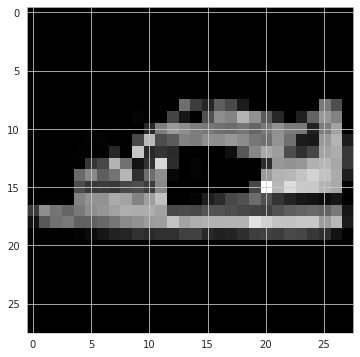

In [11]:
plt.imshow(x_train[13],cmap='gray')
# plt.matshow(x_train[13])

In [12]:
x_train[13]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [13]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
y_train[13]

5

In [ ]:
sample_size = 50
rand_indexes = np.random.randint(0, len(x_test), sample_size)
sample_images = test_images[rand_indexes]
sample_labels = test_labels[rand_indexes]
display_sample(sample_images, sample_labels, 
               plot_title='Sample of %d images' % sample_size)

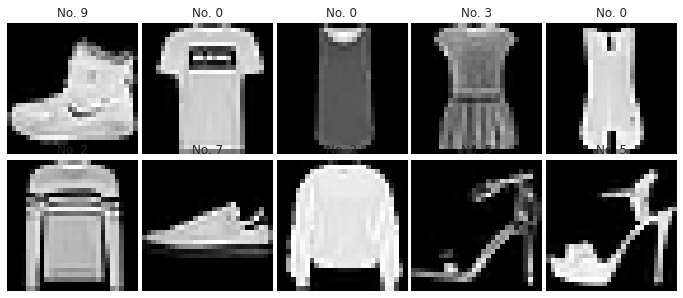

In [20]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( x_train[image_index], cmap='gray')
       
        
plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [21]:
x_train[13].min()

0

In [22]:
x_train[13].max()

254

In [23]:
# Normalize image pixels
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [24]:
x_train[13].min()

0.0

In [25]:
x_train[13].max()

0.99607843

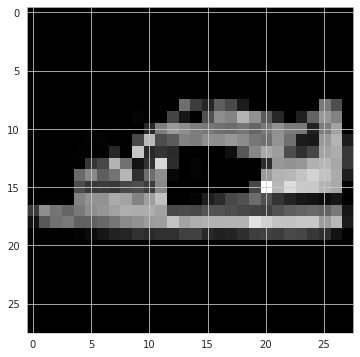

In [26]:
plt.imshow(x_train[13],cmap='gray')

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [27]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [28]:
x_train.reshape(60000, 28, 28, 1).shape


(60000, 28, 28, 1)

In [29]:
X_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [30]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [31]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [32]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [33]:
from tensorflow.keras.utils import to_categorical

In [34]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [35]:
y_train[13]

5

In [36]:
Y_train[13]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [ ]:
#input shape = IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS = (28, 28, 1)
#if multi channels (for ex: RGB) ---> (28, 28, 3)
#IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS, NUM_CLASSES = 28, 28, 1, 10

In [38]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 

model.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size, padding = valid

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=2, restore_best_weights = True)

In [52]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test),callbacks=[early_stop]) 

Epoch 1/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1082 - accuracy: 0.9623 - val_loss: 0.3795 - val_accuracy: 0.9110
Epoch 2/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1046 - accuracy: 0.9636 - val_loss: 0.3818 - val_accuracy: 0.9160
Epoch 3/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.1013 - accuracy: 0.9656 - val_loss: 0.4059 - val_accuracy: 0.9101
Epoch 4/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0971 - accuracy: 0.9683 - val_loss: 0.4125 - val_accuracy: 0.9161
Epoch 5/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0910 - accuracy: 0.9692 - val_loss: 0.4999 - val_accuracy: 0.9045


KeyboardInterrupt: ignored

**TASK 7: Plot values of metrics you used in your model.**

In [45]:
X_train.shape

(60000, 28, 28, 1)

In [46]:
Y_train.shape

(60000, 10)

In [47]:
model.metrics_names

['loss', 'accuracy']

In [48]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.128,0.956,0.373,0.905
1,0.120,0.958,0.333,0.910
2,0.116,0.960,0.337,0.912
3,0.111,0.962,0.360,0.910
4,0.105,0.964,0.396,0.911


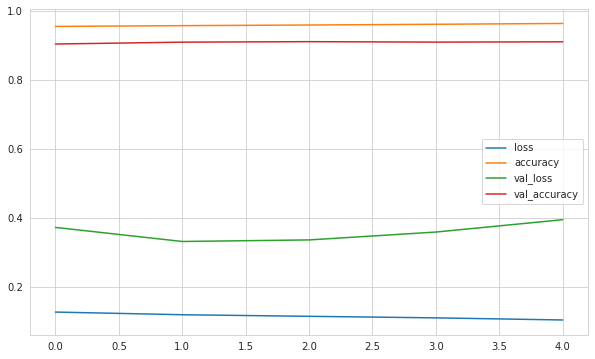

In [49]:
summary.plot();

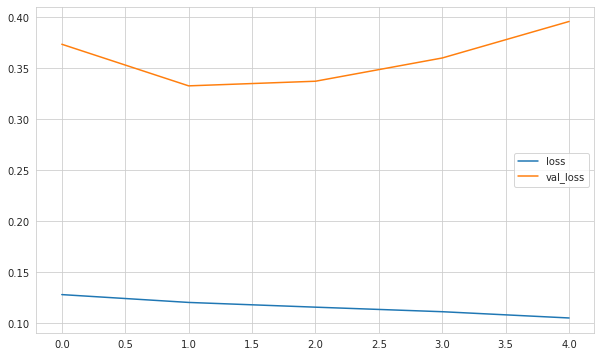

In [50]:
summary[["loss", "val_loss"]].plot();

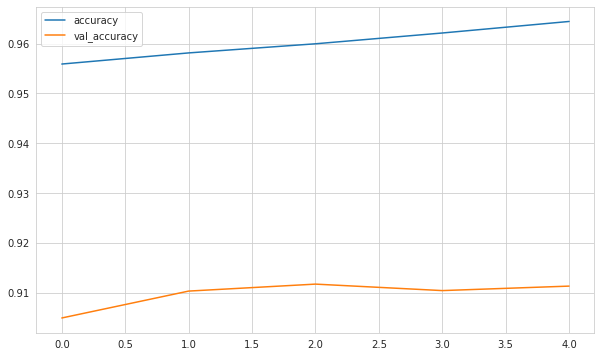

In [51]:
summary[["accuracy", "val_accuracy"]].plot();

In [55]:
#MODEL 2

model= Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1), padding='same'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                  

In [57]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 336s 179ms/step - loss: 0.4427 - accuracy: 0.8372 - val_loss: 0.3152 - val_accuracy: 0.8848
Epoch 2/50
1875/1875 [==============================] - 331s 176ms/step - loss: 0.2868 - accuracy: 0.8947 - val_loss: 0.2725 - val_accuracy: 0.8984
Epoch 3/50
1875/1875 [==============================] - 331s 177ms/step - loss: 0.2506 - accuracy: 0.9080 - val_loss: 0.2509 - val_accuracy: 0.9090
Epoch 4/50
1875/1875 [==============================] - 331s 176ms/step - loss: 0.2285 - accuracy: 0.9149 - val_loss: 0.2293 - val_accuracy: 0.9183
Epoch 5/50
1875/1875 [==============================] - 332s 177ms/step - loss: 0.2102 - accuracy: 0.9226 - val_loss: 0.2159 - val_accuracy: 0.9208
Epoch 6/50
1875/1875 [==============================] - 330s 176ms/step - loss: 0.1924 - accuracy: 0.9283 - val_loss: 0.2264 - val_accuracy: 0.9185
Epoch 7/50
1875/1875 [==============================] - 329s 175ms/step - loss: 0.1845 - accuracy: 0.9311 - val_

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [59]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [60]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 13s 42ms/step - loss: 0.1886 - accuracy: 0.9329


[0.18856209516525269, 0.9329000115394592]

In [61]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.18856209516525269
Test accuracy: 0.9329000115394592


In [62]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 13s 40ms/step


array([[5.4987535e-08, 4.6338093e-11, 2.0859643e-09, ..., 2.4053996e-05,
        6.7060885e-11, 9.9997193e-01],
       [1.1779915e-05, 3.4576317e-10, 9.9989301e-01, ..., 1.0514693e-10,
        7.5047694e-08, 3.0846554e-11],
       [2.5068980e-19, 9.9999994e-01, 4.2799943e-17, ..., 4.2853933e-36,
        4.6032549e-23, 2.6268814e-30],
       ...,
       [3.7228697e-23, 2.6373121e-31, 9.5667387e-24, ..., 8.6573747e-25,
        9.9999994e-01, 1.7621500e-25],
       [1.2063684e-11, 9.9999994e-01, 5.6517901e-10, ..., 2.8570624e-21,
        1.2191139e-14, 3.2106325e-18],
       [4.0974228e-05, 1.3099365e-10, 4.7892736e-06, ..., 4.0047657e-02,
        1.5072597e-05, 4.3976037e-05]], dtype=float32)

In [63]:
pred_prob.shape

(10000, 10)

In [64]:
pred_prob[0]

array([5.4987535e-08, 4.6338093e-11, 2.0859643e-09, 1.0718138e-10,
       1.7970761e-08, 3.8553871e-06, 3.7729759e-08, 2.4053996e-05,
       6.7060885e-11, 9.9997193e-01], dtype=float32)

In [65]:
np.argmax(pred_prob[0])

9

In [66]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [67]:
y_pred.shape

(10000,)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1000
           1       0.99      0.99      0.99      1000
           2       0.90      0.91      0.90      1000
           3       0.92      0.95      0.94      1000
           4       0.88      0.92      0.90      1000
           5       0.99      0.99      0.99      1000
           6       0.82      0.78      0.80      1000
           7       0.95      0.98      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [69]:
print(confusion_matrix(y_test, y_pred))

[[871   0  14  15   2   1  93   0   4   0]
 [  3 988   0   7   0   0   1   0   1   0]
 [ 17   2 905   8  34   0  34   0   0   0]
 [  8   2  10 949  18   0  12   0   1   0]
 [  0   0  31  21 922   0  26   0   0   0]
 [  0   0   0   0   0 991   0   7   0   2]
 [ 71   0  48  23  76   0 777   0   5   0]
 [  0   0   0   0   0   2   0 985   0  13]
 [  2   1   2   3   1   1   0   1 989   0]
 [  0   0   0   0   0   7   1  40   0 952]]


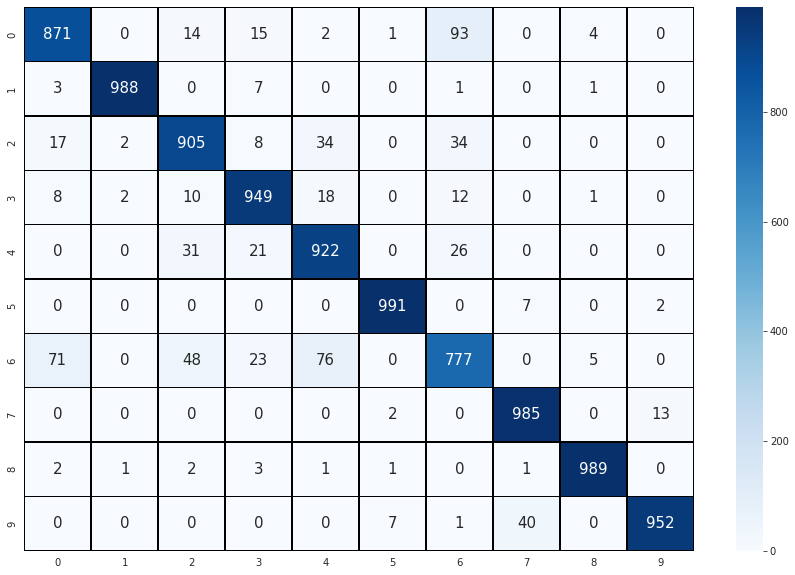

In [70]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [71]:
y_test != y_pred

array([False, False, False, ..., False, False, False])

In [72]:
(y_test != y_pred).sum()

671

In [75]:
model.metrics_names

['loss', 'accuracy']

## Prediction

In [ ]:
my_prediction = X_test[3]

In [ ]:
my_prediction.shape

In [ ]:
plt.imshow(my_prediction.reshape(28,28));

In [ ]:
pred_prob = model.predict(my_prediction.reshape(1,28,28,1))
pred_prob

In [ ]:
# SHAPE --> (num_images,width,height,color_channels)
y_pred = np.argmax(pred_prob)
y_pred

In [ ]:
model.save("cnn-2.h5")

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___